In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#(a)
q=1.77/100
r=1.5/100
S0=282
sigma = 1.9
v0 = 0.05 
k = 3.65
rho = -0.8
theta = 0.07
T=1
K=285


In [3]:
#(b)
N=100000 # 1000 paths
M=1000


def heston_path_generate(sigma,v0,k,rho,theta,q,r,S0,T,N,M):
    
    S=np.zeros((M+1,N))
    S[0]=S0
    v=np.zeros((M+1,N))
    v[0]=v0
    
    dt=T/M
    
    for i in range(M):
        
        z1=np.random.standard_normal(N)
        z2=np.random.standard_normal(N)
        w1=np.sqrt(dt)*z1
        w2=np.sqrt(dt)*(rho*z1+np.sqrt(1-rho**2)*z2)
        
        S[i+1]=S[i]+(r-q)*S[i]*dt+np.sqrt(v[i])*S[i]*w1
        v[i+1]=np.maximum(k*(theta-v[i])*dt+sigma*np.sqrt(v[i])*w2+v[i],0)
        
        
    MT=np.zeros(N)    
    for i in range(N):
        MT[i]=np.max(S[:,i])
        
    return S,MT
        
        
        
    
    
    
    
    

In [4]:
S,MT=heston_path_generate(sigma,v0,k,rho,theta,q,r,S0,T,N,M)

In [5]:
S,MT

(array([[282.        , 282.        , 282.        , ..., 282.        ,
         282.        , 282.        ],
        [285.79684858, 280.60412247, 280.39769065, ..., 287.88892876,
         280.71595061, 280.50246007],
        [285.47297586, 281.41426782, 282.31237815, ..., 287.62362743,
         277.96951169, 281.28607625],
        ...,
        [360.06791513, 260.41711391, 219.9620932 , ..., 240.36311357,
         330.32575431, 286.66289182],
        [360.86246943, 260.23775424, 220.24807612, ..., 240.22482403,
         326.34885462, 286.4259394 ],
        [359.56507937, 260.46297194, 220.22019984, ..., 240.32155031,
         322.49543948, 286.29404233]]),
 array([364.66531963, 298.66823137, 287.47642628, ..., 304.16653622,
        330.32575431, 321.70119671]))

In [6]:
MT

array([364.66531963, 298.66823137, 287.47642628, ..., 304.16653622,
       330.32575431, 321.70119671])

In [7]:
def normal_price(K1):
    c0=np.maximum(S[-1,:]-K1,0)
    
    return np.exp(-(r+q)*T)*np.mean(c0)

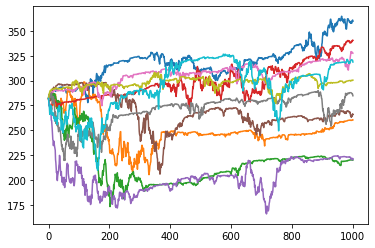

In [8]:
c0=normal_price(285)
plt.plot(S[:,:10])
plt.savefig('1_1.jpg')

In [9]:
c0

22.359487806337516

In [10]:
# fft
sigma = 1.9
v0 = 0.05 
k = 3.65
rho = -0.8
theta = 0.07
alpha=1
t=1
j=complex(0,1)
N=2**10
K1=285


def w(u):

    lambda1=np.sqrt(sigma**2*(u**2+j*u)+(k-j*rho*sigma*u)**2)

    A=np.exp(j*u*np.log(S0)+j*u*(r-q)*t+(k*theta*t*(k-j*rho*sigma*u))/(sigma**2))
    B=(np.cosh(lambda1*t/2)+(k-j*rho*sigma*u)/(lambda1)*np.sinh((lambda1*t/2)))**((2*k*theta)/(sigma**2))

    return A/B


def phi(u):

    lambda1 = np.sqrt(sigma ** 2 * (u ** 2 + j * u) + (k - j * rho * sigma * u) ** 2)
    C=np.exp(-((u**2+j*u)*v0)/(lambda1*np.cosh(lambda1*t/2)/(np.sinh(lambda1*t/2))+k-j*rho*sigma*u))

    return w(u)*C

def kesai(v):

    D=(np.exp(-r*t))/((alpha+j*v)*(alpha+j*v+1))

    return D*phi(v-(alpha+1)*j)


def pre_fft(N,K_1,S0,sigma,v0,k,rho,theta,q,r,t,alpha):
    b = 600


    dv = b / N
    dk = 2 * np.pi / b
    beta = np.log(S0) -  dk * N / 2
    vv = np.linspace(0, b, N+1)[0:-1]
    kk = np.linspace(0,N,N+1)[0:-1]*dk+beta

    x=[]
    for i in range(1,N+1):

        if i==1:
            delta=1
        else:
            delta=0

        a=((2-delta)*dv*np.exp(-r*t))/(2*(alpha+j*vv[i-1])*(alpha+j*vv[i-1]+1))
        b=np.exp(-j*(np.log(S0)-(dk*N/2))*vv[i-1])*phi(vv[i-1]-(alpha+1)*j)

        x.append(a*b)

    y = np.fft.fft(x)
    y_real = y.real
    CT = []
    for i in range(1, N + 1):
        aa = np.exp(-alpha * (np.log(S0) - dk * (N / 2 - (i - 1)))) / np.pi * y_real[i - 1]
        CT.append(aa)

    cc = np.interp(K1, np.exp(kk), CT)


    return [cc,[kk,CT]]

In [11]:
sigma = 1.9
v0 = 0.05 
k = 3.65
rho = -0.8
theta = 0.07
alpha=1
t=1
j=complex(0,1)
N=2**10
K1=285
[cc,[kk,CT]]=pre_fft(N,K1,S0,sigma,v0,k,rho,theta,q,r,t,alpha)
cc

18.523241425992897

In [12]:
MT

array([364.66531963, 298.66823137, 287.47642628, ..., 304.16653622,
       330.32575431, 321.70119671])

In [13]:
S

array([[282.        , 282.        , 282.        , ..., 282.        ,
        282.        , 282.        ],
       [285.79684858, 280.60412247, 280.39769065, ..., 287.88892876,
        280.71595061, 280.50246007],
       [285.47297586, 281.41426782, 282.31237815, ..., 287.62362743,
        277.96951169, 281.28607625],
       ...,
       [360.06791513, 260.41711391, 219.9620932 , ..., 240.36311357,
        330.32575431, 286.66289182],
       [360.86246943, 260.23775424, 220.24807612, ..., 240.22482403,
        326.34885462, 286.4259394 ],
       [359.56507937, 260.46297194, 220.22019984, ..., 240.32155031,
        322.49543948, 286.29404233]])

In [14]:
#(d)
def up_down_price(K1,K2):
    
    a=np.maximum(S[-1,:]-K1,0)
    
    b=np.sign(np.maximum(K2-MT,0))
    
    c0=a*b
    
    
    
    return np.exp(-(r+q)*T)*np.mean(c0)


In [15]:
K1=285
K2=315
c1=up_down_price(K1,K2)
c1

1.6603808594990763

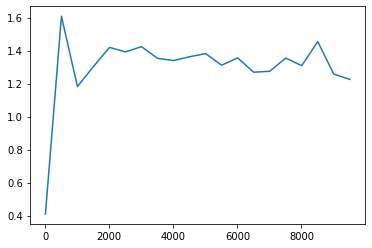

In [16]:
cc=[]
NN=np.arange(10,10000,500)
M=100
for i in NN:
    
    N=i

    S,MT=heston_path_generate(sigma,v0,k,rho,theta,q,r,S0,T,N,M)
    c1=up_down_price(K1,K2)
    
    cc.append(c1)
    
plt.plot(NN,cc)
plt.savefig('1_2.jpg')
    
    

In [17]:
NN

array([  10,  510, 1010, 1510, 2010, 2510, 3010, 3510, 4010, 4510, 5010,
       5510, 6010, 6510, 7010, 7510, 8010, 8510, 9010, 9510])

In [18]:
phi(1)

(0.7591273430109463-0.5932459031192714j)

In [19]:
#(e)
def control_variate1(S,M,MT,K1,K2):
    
    a=np.maximum(S[-1,:]-K1,0)
    
    b=np.sign(np.maximum(K2-MT,0))
    
    theta=a*b
    
    Z=np.maximum(S[-1,:]-K1,0)
    
    c_star=-np.cov(theta,Z)[0][1]/np.var(Z)
    
    theta_hat=theta+c_star*(Z-np.mean(Z))
    
    return np.exp(-(r+q)*T)*np.mean(theta_hat)
    

In [20]:
control_variate1(S,M,MT,K1,K2)

1.2253039237548935

In [21]:
def control_variate(r,T,S,M,K1,K2):
    payoff = np.maximum(S[-1] - K1,0)
    sign = [m<K2 for m in MT]
    hx = payoff*sign
    
    
    
    Z = np.maximum(S[-1] - K1,0)
    
    c = -np.cov(hx,Z)[0][1]/np.var(Z)
    theta_hat = hx + c*(Z-np.mean(Z))
    
    return np.exp(-(r+q)*T)*np.mean(theta_hat)

In [22]:
c2 =control_variate(r,T,S,M,K1,K2)
print(c2)

1.2253039237548935


In [23]:
M

100

-0.09232713931200741
-0.023620179429481643
0.09159225965987756


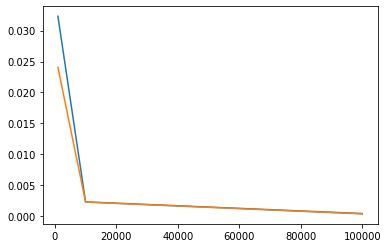

In [27]:
Theta = []
Theta_hat = []
theta1=0.07
N = [10**i for i in range(3,6)]
M=1000
times = 10
j = 0
i = 0
theta = np.zeros((len(N),times))
z = np.zeros((len(N),times))
while j <len(N):
    n = N[j]
    i = 0
    while i<times:
        S,MT = heston_path_generate(sigma,v0,k,rho,theta1,q,r,S0,T,n,M)
        hx = np.maximum(S[-1] - K1,0)*[m<K2 for m in MT]
        theta[j,i] = np.mean(hx)
        euro_call = np.mean(np.maximum(S[-1] - K1,0))
        z[j,i] = euro_call
        i += 1
    c = -np.cov(theta[j,:],z[j,:])[0][1]/np.var(z[j,:])
    print(c)
    theta_hat = theta[j,:] + c*(z[j,:]-np.mean(z[j,:]))
    Theta.append(np.var(theta[j,:]))
    Theta_hat.append(np.var(theta_hat))
    j += 1
plt.plot(N,Theta)
plt.plot(N,Theta_hat)
plt.savefig('1_3.jpg')
plt.show()

In [ ]:
S,MT = heston_path_generate(n,M,sigma,v0,k,rho,q,r,S0,T)
S,MT

In [ ]:
S

In [ ]:
sigma,v0,k,rho,q,r,S0,T,n

In [ ]:
S.shape,MT.shape

In [ ]:
hx,theta_hat=control_variate_theta(r,T,S,n,K1,K2)
hx,theta_hat

In [ ]:
Theta_hat

In [ ]:
sigma,v0,k,rho,theta,q,r,S0,T,N,M